In [238]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import random

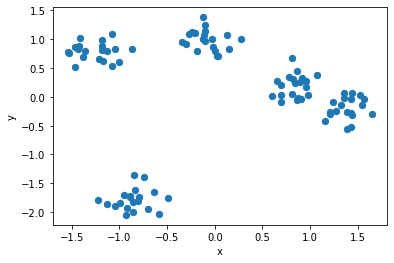

In [240]:
#let's suppose to create 5 unlabelled clusters
X, _=make_blobs(n_samples=100, centers=5, random_state=42)
X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], s=40)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#K-Means clustering from scratch#

In [262]:
#to compute distance between one point and the others let's consider the euclidean distance
def euclidean_distance(x_i,centroids):
  euc_dists = []
  for i in range(len(centroids)):
    euc_dist= np.sqrt(np.sum((x_i-centroids[i])**2,axis=1))
    euc_dists.append(euc_dist)
  return euc_dists

def update_centroid_pos(centroids, prev_centroids, centroids_clusters):
  new_centroid_pos = []
  for list_of_points,prev_pos in zip(centroids_clusters,prev_centroids):
    if len(list_of_points) == 0:
      mean_centroid = prev_pos
    else:
      mean_centroid = np.mean(list_of_points,axis=0)
    
    new_centroid_pos.append(mean_centroid.reshape(-1,1).T)
  return new_centroid_pos

#initialize the centroids positions with the k++ method, where the first centroid is taken randomly from the data points
#the distances are computed from this point and then we select the next centroid randomly, with a probability proportional to the total distance to the centroids
#the process is repeated till all the centroids have been initialized.
def k_means_plus_plus(X,n_clusters):
  centroids = [random.choice(X).reshape(-1,1).T]
  euc_dist = 0
  for _ in range(n_clusters-1):
    #compute distances from centroid to all the data points
    for centroid in centroids:
      euc_dist = euclidean_distance(centroid, X)
    # normalize distances
    euc_dist /= np.sum(euc_dist)
    #remaining points are chosen based on their distances
    new_c_idx = np.random.choice(range(len(X)))
    centroids += [X[new_c_idx].reshape(-1,1).T]
  #print(centroids)
  return centroids

def K_means(X,n_clusters,n_iteration):
  #k++ centroid initialization
  centroids = k_means_plus_plus(X,n_clusters)
  #at this point we iteratively adjust the centroids position according to the means of the points belonging to it
  #first we iterate till (in general) the centroid stop moving
  j = 0
  past_cent_pos = None
  while np.not_equal(centroids,past_cent_pos).any() and j<n_iteration:
    
    #create a list where each element represent a list of samples for each centroid to find clusters
    centroids_clusters = [[] for _ in range(n_clusters)]
    for x_i in X:
      #compute the distance from a sample to each centroid
      euc_distances = euclidean_distance(x_i,centroids)
      #get the centroid with lowest distance from the point
      c_idx = np.argmin(euc_distances)
      #print(c_idx)
      #add the data point to the list of the minimum distance centroid
      centroids_clusters[c_idx].append(x_i)
      #update the centroids position by taking the means of the data points in their respective lists
    past_cent_pos = centroids     
    centroids = update_centroid_pos(centroids,past_cent_pos,centroids_clusters)
    j+=1

  return centroids

centroids = K_means(X,n_clusters=5,n_iteration=1000)

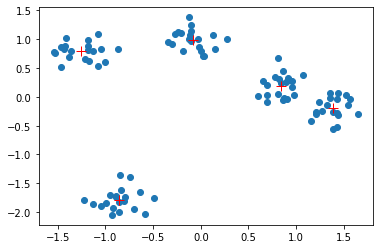

In [263]:
plt.scatter(x=[X[0] for X in X], y=[X[1] for X in X])
plt.plot([x[0][0] for x in centroids],[y[0][1] for y in centroids],'+',c = 'r',markersize=10)
plt.show()

*Comparison with Sklearn model*

In [264]:
from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k) 
y_pred = kmeans.fit_predict(X)

centroids_sk = kmeans.cluster_centers_
print('centroids: \n' ,centroids_sk)

centroids: 
 [[-1.25790785  0.78626163]
 [-0.08246807  0.98545119]
 [ 1.38517539 -0.20092083]
 [-0.85560376 -1.78334025]
 [ 0.83815529  0.19285925]]


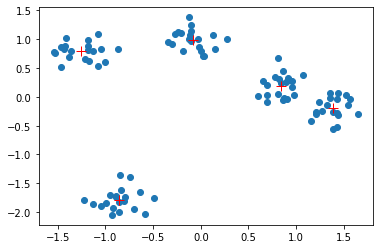

In [265]:
plt.scatter(x=[X[0] for X in X], y=[X[1] for X in X])
plt.plot([x_sk[0] for x_sk in centroids_sk],[y_sk[1] for y_sk in centroids_sk],'+',c = 'r',markersize=10)
plt.show()